In [1]:
!nvidia-smi

Sat Mar 23 02:15:56 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.39       Driver Version: 418.39       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   77C    P0    46W /  70W |   1286MiB / 15079MiB |     34%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [2]:
import gc

In [3]:
from fastai.vision import ImageDataBunch,ImageList,get_transforms,models,cnn_learner,accuracy

In [3]:
path ='/home/qnkhuat/data/emotion_compilation_split'

In [4]:
tfms = get_transforms(do_flip=True,flip_vert=False)

In [5]:
# ran this get erro in THcroe
data = (ImageDataBunch.from_folder(path,test='test',size=48,ds_tfms=tfms,bs=256)
       .normalize())

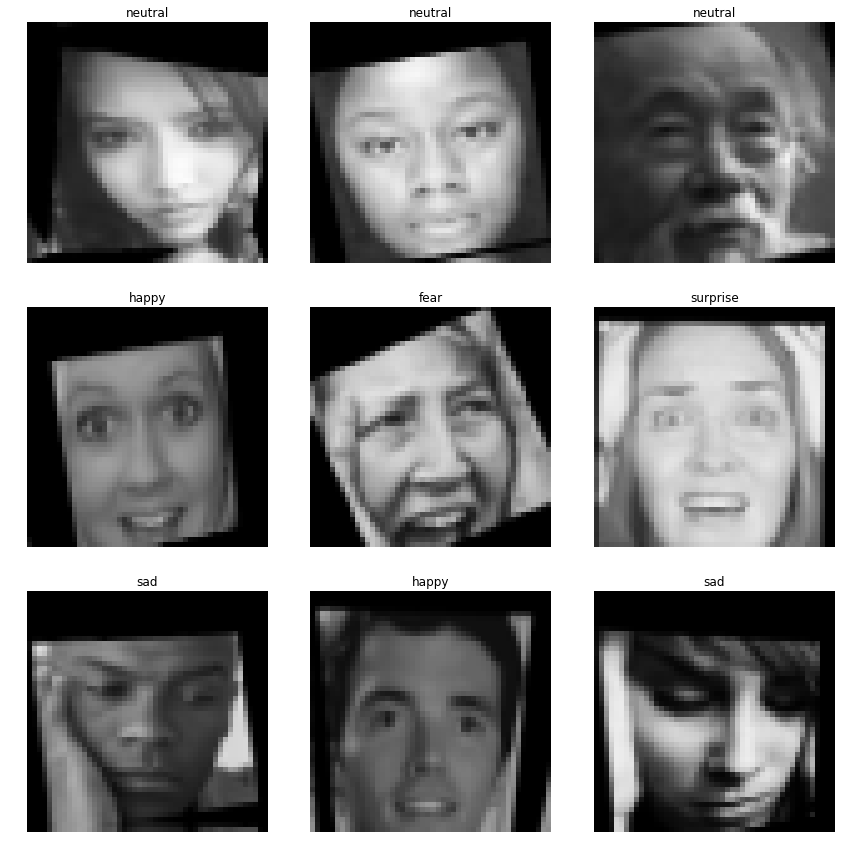

In [6]:
data.show_batch(rows=3)

In [7]:
learn = cnn_learner(data, models.resnet34)

In [8]:
learn.model_dir = '/home/qnkhuat/AI/vision/emotion_retrain/models'

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


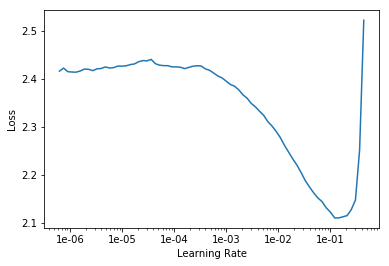

In [9]:
learn.lr_find()
learn.recorder.plot()

In [10]:
learn.metrics = [accuracy]

In [11]:
learn.fit(3,lr=1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,1.236033,1.019705,0.641081,00:16
1,1.020561,0.975446,0.643812,00:17
2,0.936704,0.938140,0.670404,00:16


In [12]:
learn.fit_one_cycle(6)

epoch,train_loss,valid_loss,accuracy,time
0,0.869626,0.804381,0.708639,00:16
1,0.846587,0.802503,0.712089,00:16
2,0.833746,0.783088,0.716688,00:17
3,0.817501,0.770907,0.718413,00:17
4,0.807376,0.762643,0.719994,00:16
5,0.808493,0.762537,0.718701,00:16


In [13]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


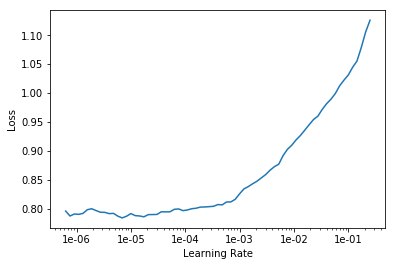

In [14]:
learn.lr_find()
learn.recorder.plot()

In [15]:
learn.fit_one_cycle(12)

epoch,train_loss,valid_loss,accuracy,time
0,0.810707,0.743727,0.732643,00:17
1,0.777558,0.767853,0.719276,00:17
2,0.744958,0.716897,0.736956,00:17
3,0.703468,0.687262,0.754923,00:16
4,0.663905,0.694288,0.760960,00:16
5,0.620574,0.643727,0.772316,00:18
6,0.579598,0.567652,0.798045,00:17
7,0.542255,0.556320,0.792870,00:17
8,0.503199,0.533792,0.809832,00:16
9,0.461016,0.515955,0.813857,00:16


In [16]:
learn.save('resnet34_82.1.pth')

In [17]:
learn.fit(20,lr=10e-6)

epoch,train_loss,valid_loss,accuracy,time
0,0.413433,0.505661,0.819750,00:16
1,0.420134,0.505385,0.821187,00:16
2,0.415082,0.505633,0.821187,00:17
3,0.406111,0.502985,0.821906,00:16
4,0.405335,0.507553,0.821044,00:16
5,0.399254,0.506100,0.821331,00:16
6,0.400635,0.503059,0.821044,00:17
7,0.394546,0.502650,0.822050,00:17
8,0.397428,0.502483,0.824637,00:16
9,0.393224,0.501707,0.824493,00:17


In [21]:
learn.save('resnet34_82.3.pth')

In [20]:
learn.TTA()

(tensor([[5.0696e-01, 1.0025e-02, 1.9302e-02,  ..., 2.2581e-01, 2.6201e-02,
          6.8027e-02],
         [4.4167e-01, 5.4438e-03, 2.8831e-02,  ..., 1.2456e-01, 4.7379e-02,
          3.3526e-01],
         [7.0918e-01, 1.2546e-02, 4.6358e-03,  ..., 1.1173e-01, 6.1951e-02,
          1.5819e-02],
         ...,
         [1.4902e-03, 3.1919e-04, 1.7964e-02,  ..., 6.1150e-02, 1.5465e-02,
          9.0227e-01],
         [2.4428e-02, 1.5802e-03, 1.4149e-02,  ..., 4.3965e-01, 1.0170e-02,
          4.3542e-01],
         [1.5385e-02, 1.3902e-03, 1.2905e-02,  ..., 1.5356e-01, 1.2841e-02,
          7.5798e-01]]), tensor([0, 0, 0,  ..., 6, 6, 6]))

In [17]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.801109,0.755753,0.729769,00:15
1,0.722545,0.639648,0.770160,00:16
2,0.638640,0.587517,0.787696,00:16


In [18]:
learn.fit(20,lr=10e-6)

epoch,train_loss,valid_loss,accuracy,time
0,0.588217,0.580909,0.787408,00:17
1,0.572399,0.574815,0.788989,00:16
2,0.568395,0.571505,0.792296,00:16
3,0.560826,0.568026,0.792152,00:16
4,0.557334,0.566723,0.793158,00:17
5,0.549105,0.562036,0.796464,00:17
6,0.538897,0.560790,0.797039,00:16
7,0.535602,0.556499,0.796176,00:16
8,0.526096,0.555482,0.798045,00:16
9,0.523066,0.553081,0.798045,00:17
